# **Swiggy Data Automation Tool**

## **Objective**

To analyze delivery data and identify key patterns, such as peak delivery times, average delivery distances, and locations with the highest delays, using Python.

## **1. Importing Libraries**

**Theory:**

We start by importing the necessary libraries. Since this project uses core Python and some basic libraries, we’ll utilize:
- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot`: For visualizing trends in the data.

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

## **2. Loading the Dataset**

**Theory:**

We load the previously generated dataset and inspect its structure to understand the columns, data types, and possible issues like null values or incorrect formats.

In [15]:
# Load the dataset
file_name = "swiggy_delivery_data.csv"
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

Dataset Overview:
   Order ID Delivery Location Delivery Time (HH:MM:SS) Order Status  \
0  ORD00001           Chennai                  0:28:03      Delayed   
1  ORD00002         Bangalore                  0:44:26    Completed   
2  ORD00003              Pune                  1:56:01    Completed   
3  ORD00004            Mumbai                  0:06:55    Completed   
4  ORD00005         Bangalore                  1:45:58    Completed   

  Delivery Date Delivery Person ID  Distance (km)  
0    2024-01-11              DP020           5.85  
1    2024-01-07              DP041          19.35  
2    2024-01-01              DP003          13.47  
3    2024-01-25              DP001           2.52  
4    2024-01-15              DP031           2.16  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   O

## **3. Data Cleaning**

**Theory:**

Data cleaning involves handling null values, converting data types, and formatting columns for consistent analysis. Here, we:
1. Check for and handle missing values.
2. Convert delivery times to seconds for easier calculations.
3. Format dates for date-based analysis.

In [16]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'Delivery Time (HH:MM:SS)' to seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df['Delivery Time (seconds)'] = df['Delivery Time (HH:MM:SS)'].apply(time_to_seconds)

# Convert 'Delivery Date' to datetime format
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

# Display cleaned data
print("\nCleaned Data Sample:")
print(df.head())


Missing Values:
Order ID                    0
Delivery Location           0
Delivery Time (HH:MM:SS)    0
Order Status                0
Delivery Date               0
Delivery Person ID          0
Distance (km)               0
dtype: int64

Cleaned Data Sample:
   Order ID Delivery Location Delivery Time (HH:MM:SS) Order Status  \
0  ORD00001           Chennai                  0:28:03      Delayed   
1  ORD00002         Bangalore                  0:44:26    Completed   
2  ORD00003              Pune                  1:56:01    Completed   
3  ORD00004            Mumbai                  0:06:55    Completed   
4  ORD00005         Bangalore                  1:45:58    Completed   

  Delivery Date Delivery Person ID  Distance (km)  Delivery Time (seconds)  
0    2024-01-11              DP020           5.85                     1683  
1    2024-01-07              DP041          19.35                     2666  
2    2024-01-01              DP003          13.47                     6961  
3  

## **4. Exploratory Data Analysis (EDA)**

### **4.1 Average Delivery Time by Location**

**Theory:**

Analyzing average delivery time by city can help identify bottlenecks in specific locations.

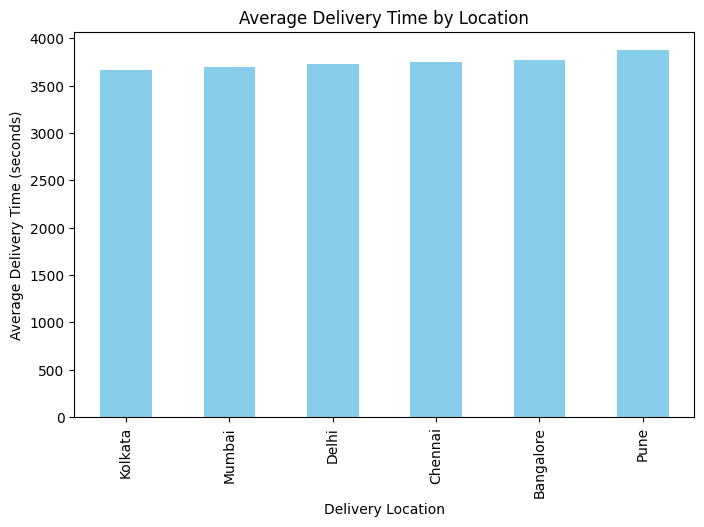

In [17]:
# Calculate average delivery time per location
avg_time_by_location = df.groupby('Delivery Location')['Delivery Time (seconds)'].mean()

# Plot the results
plt.figure(figsize=(8, 5))
avg_time_by_location.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time by Location')
plt.xlabel('Delivery Location')
plt.ylabel('Average Delivery Time (seconds)')
plt.show()

### **4.2 Delivery Status Distribution**

**Theory:**

Understanding the distribution of order statuses (Completed, Cancelled, Delayed) helps evaluate overall performance.

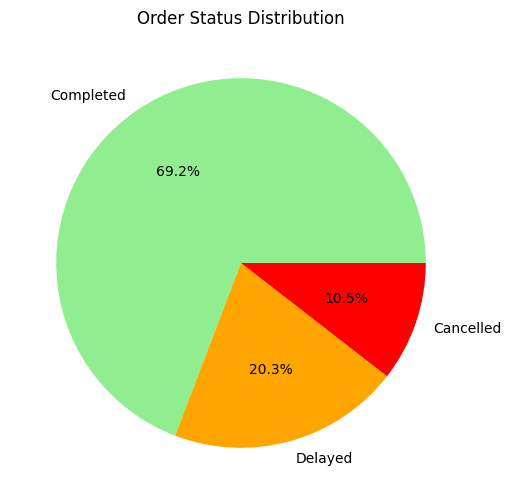

In [18]:
# Plot the distribution of order statuses
status_counts = df['Order Status'].value_counts()

plt.figure(figsize=(6, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange', 'red'])
plt.title('Order Status Distribution')
plt.ylabel('')  # Remove y-axis label for cleaner display
plt.show()

### **4.3 Peak Delivery Hours**

**Theory:**

Identifying peak delivery hours helps Swiggy allocate resources effectively.

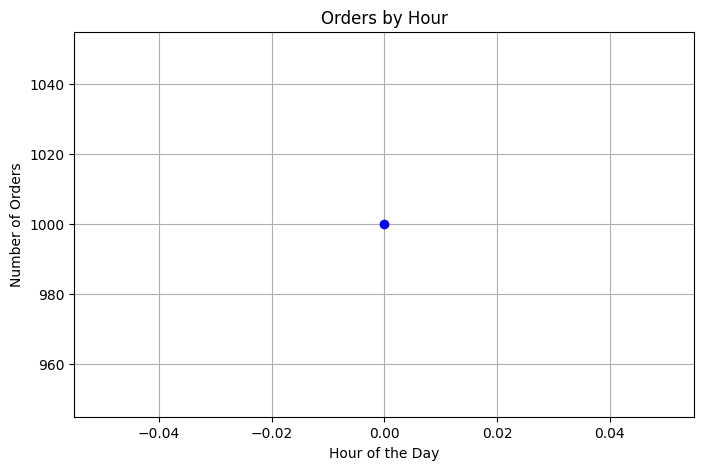

In [19]:
# Extract delivery hour from the date
df['Delivery Hour'] = df['Delivery Date'].dt.hour

# Calculate order counts per hour
orders_by_hour = df['Delivery Hour'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(8, 5))
orders_by_hour.plot(kind='line', marker='o', color='blue')
plt.title('Orders by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### **4.4 Distance vs. Delivery Time**

**Theory:**

Analyzing the relationship between distance and delivery time provides insights into logistical efficiency.

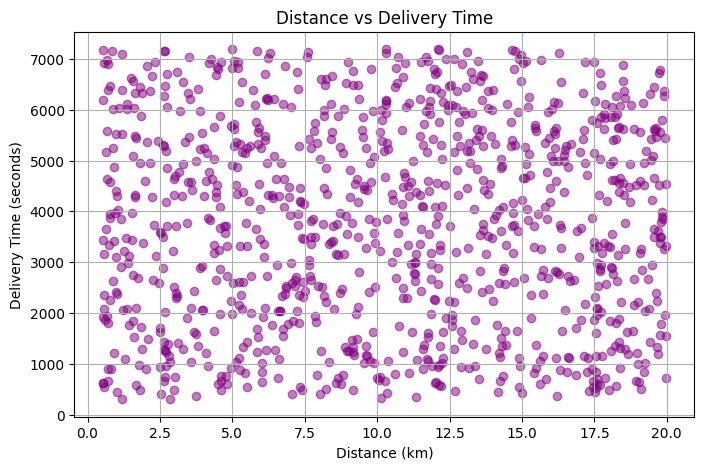

In [20]:
# Scatter plot of distance vs delivery time
plt.figure(figsize=(8, 5))
plt.scatter(df['Distance (km)'], df['Delivery Time (seconds)'], alpha=0.5, color='purple')
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (seconds)')
plt.grid()
plt.show()

## **5. Generating Key Insights**

**Theory:**

Summarize key metrics such as:
- Average delivery time.
- Peak delivery hours.
- Locations with the most delays.

In [21]:
# Calculate key metrics
avg_delivery_time = df['Delivery Time (seconds)'].mean()
peak_hour = orders_by_hour.idxmax()
most_delayed_location = df[df['Order Status'] == 'Delayed']['Delivery Location'].value_counts().idxmax()

print(f"Average Delivery Time: {avg_delivery_time:.2f} seconds")
print(f"Peak Delivery Hour: {peak_hour}:00")
print(f"Location with Most Delays: {most_delayed_location}")

Average Delivery Time: 3749.16 seconds
Peak Delivery Hour: 0:00
Location with Most Delays: Chennai


## **6. Save Processed Data**

**Theory:**

Save the processed dataset with new features for future use.

In [22]:
# Save the processed dataset
processed_file_name = "processed_swiggy_delivery_data.csv"
df.to_csv(processed_file_name, index=False)
print(f"Processed data saved as {processed_file_name}")

Processed data saved as processed_swiggy_delivery_data.csv
